# Looking at the New Dataset Distributions

This notebook analyzes the dataset that was used for training the new enhanced model.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [6]:
# Load the dataset
df = pd.read_csv('../FER-New-Dataset/dataset_calm_reduced.csv')
print(f"Total images in CSV: {len(df)}")
df.head()

Total images in CSV: 259930


,image_path,emotion,race,gender,age,augmented,usage,split
0,FER-New-Dataset/FER-New-Dataset/RAF/calm/4476.jpg,calm,African-American,female,4-19,original,NaN,train
1,FER-New-Dataset/FER-New-Dataset/RAF/calm/1890.jpg,calm,Asian,male,40-69,original,NaN,train
2,FER-New-Dataset/FER-New-Dataset/FER/calm/1755.png,calm,African-American,male,40-69,original,NaN,train
3,FER-New-Dataset/FER-New-Dataset/FER/calm/5977.png,calm,Caucasian,female,20-39,original,NaN,train
4,FER-New-Dataset/FER-New-Dataset/RAF/calm/3996.jpg,calm,Caucasian,male,20-39,original,NaN,train


In [7]:
# Extract dataset source from image_path
# Path format: FER-New-Dataset/FER-New-Dataset/RAF/calm/1.jpg
def extract_dataset_source(path):
    parts = path.split('/')
    if len(parts) >= 3:
        return parts[2]  # RAF, FER, or CKP
    return 'unknown'

df['dataset_source'] = df['image_path'].apply(extract_dataset_source)

# Filter only original (non-augmented) images
df_orig = df[df['augmented'] == 'original'].copy()
print(f"\nOriginal (non-augmented) images: {len(df_orig)}")
print(f"Augmented images: {len(df[df['augmented'] != 'original'])}")


Original (non-augmented) images: 23630
Augmented images: 236300


## Dataset Source Distribution

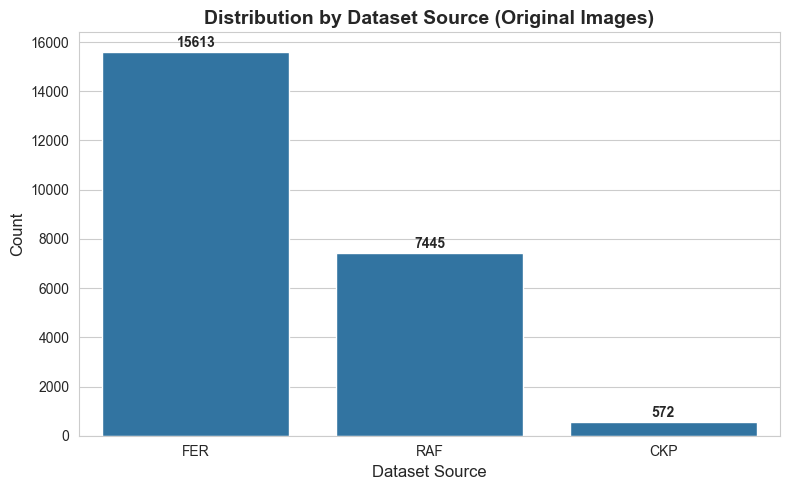


Dataset source counts:
dataset_source
FER    15613
RAF     7445
CKP      572
Name: count, dtype: int64


In [8]:
plt.figure(figsize=(8, 5))
counts = df_orig['dataset_source'].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.title('Distribution by Dataset Source (Original Images)', fontsize=14, fontweight='bold')
plt.xlabel('Dataset Source', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add count labels
ax = plt.gca()
for i, v in enumerate(counts.values):
    ax.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nDataset source counts:")
print(counts)

## Emotion Distribution

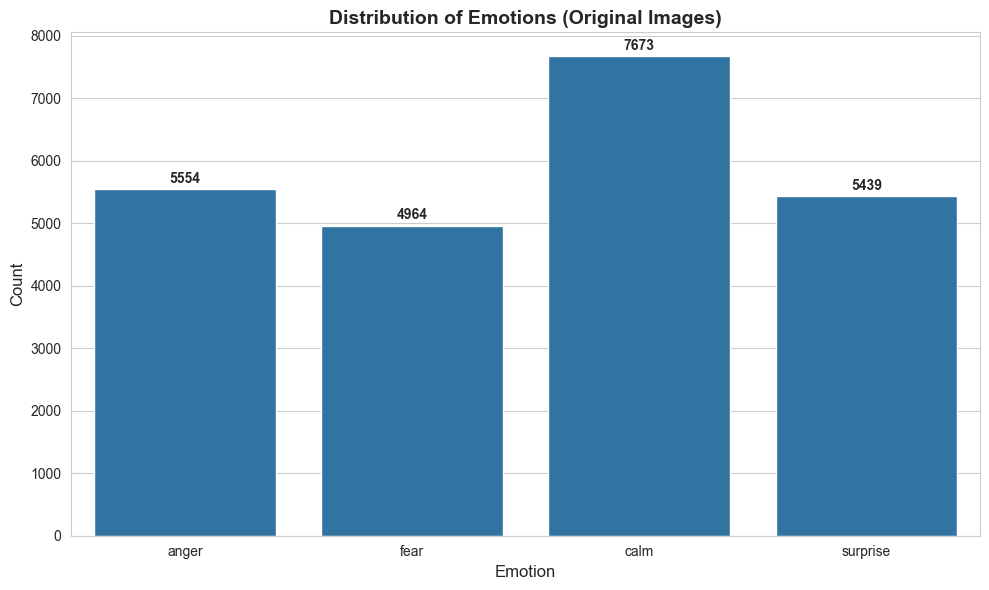


Emotion counts:
emotion
anger       5554
fear        4964
calm        7673
surprise    5439
Name: count, dtype: int64


In [9]:
plt.figure(figsize=(10, 6))
emotion_order = ['anger', 'fear', 'calm', 'surprise']
counts = df_orig['emotion'].value_counts()[emotion_order]
sns.barplot(x=counts.index, y=counts.values)
plt.title('Distribution of Emotions (Original Images)', fontsize=14, fontweight='bold')
plt.xlabel('Emotion', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add count labels
ax = plt.gca()
for i, v in enumerate(counts.values):
    ax.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nEmotion counts:")
print(counts)

## Race Distribution

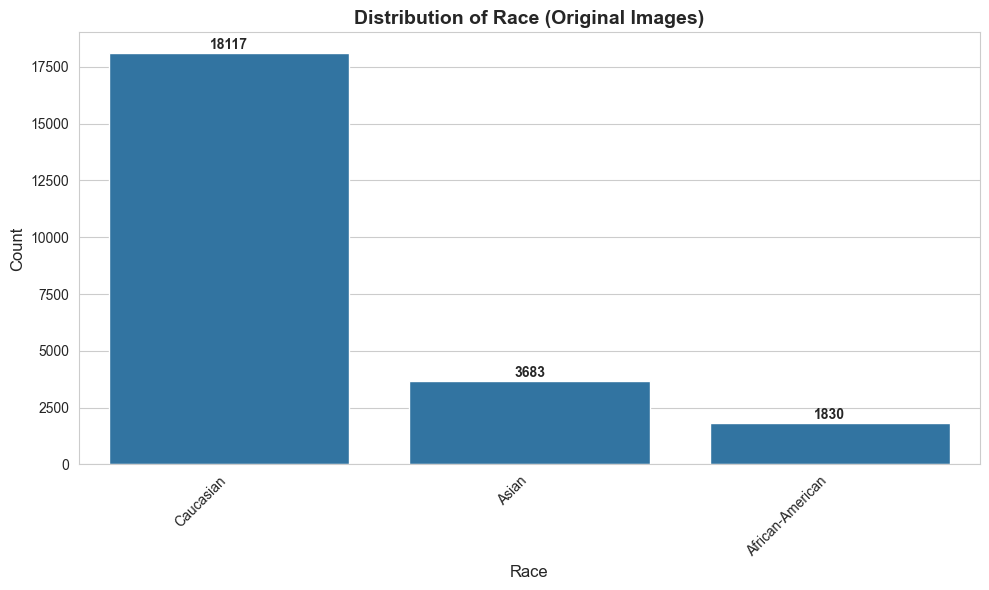


Race counts:
race
Caucasian           18117
Asian                3683
African-American     1830
Name: count, dtype: int64


In [10]:
# Filter out empty/unknown race values
df_race = df_orig[df_orig['race'].notna() & (df_orig['race'] != '') & (df_orig['race'] != 'unknown')]

plt.figure(figsize=(10, 6))
counts = df_race['race'].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.title('Distribution of Race (Original Images)', fontsize=14, fontweight='bold')
plt.xlabel('Race', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add count labels
ax = plt.gca()
for i, v in enumerate(counts.values):
    ax.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nRace counts:")
print(df_orig['race'].value_counts())

## Gender Distribution

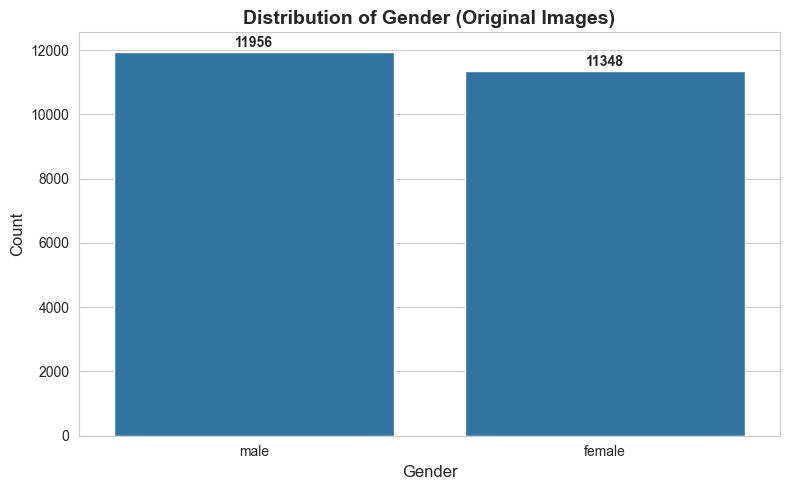


Gender counts:
gender
male      11956
female    11348
unsure      326
Name: count, dtype: int64


In [11]:
# Filter out empty/unknown gender values
df_gender = df_orig[df_orig['gender'].notna() & (df_orig['gender'] != '') & (df_orig['gender'] != 'unknown') & (df_orig['gender'] != 'unsure')]

plt.figure(figsize=(8, 5))
counts = df_gender['gender'].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.title('Distribution of Gender (Original Images)', fontsize=14, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add count labels
ax = plt.gca()
for i, v in enumerate(counts.values):
    ax.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nGender counts:")
print(df_orig['gender'].value_counts())

## Age Distribution

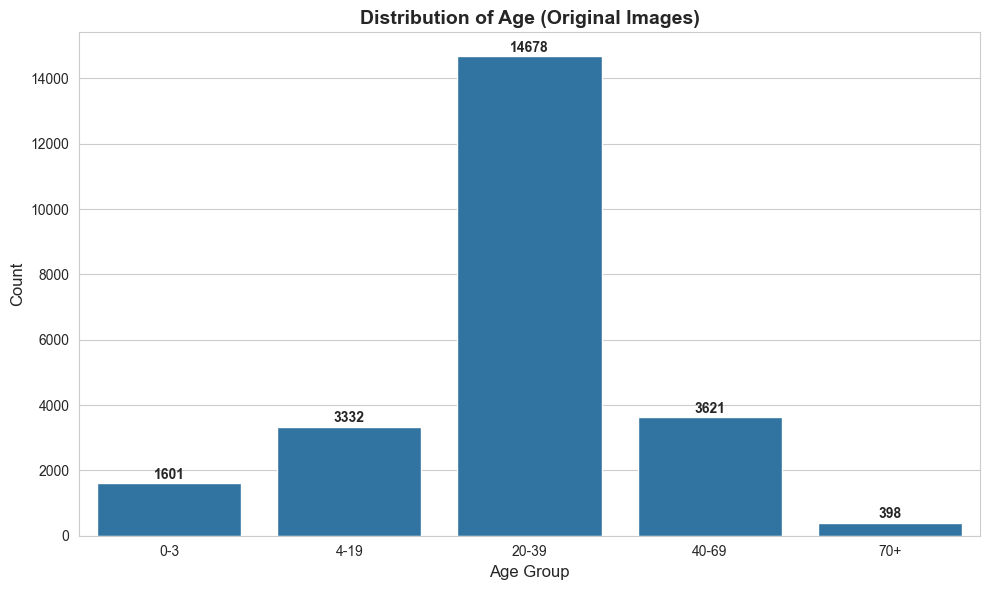


Age counts:
age
20-39    14678
40-69     3621
4-19      3332
0-3       1601
70+        398
Name: count, dtype: int64


In [12]:
# Filter out empty/unknown age values
df_age = df_orig[df_orig['age'].notna() & (df_orig['age'] != '') & (df_orig['age'] != 'unknown')]

# Define age order
age_order = ['0-3', '4-19', '20-39', '40-69', '70+']
# Get counts in the specified order
counts = df_age['age'].value_counts()[age_order]

plt.figure(figsize=(10, 6))
sns.barplot(x=counts.index, y=counts.values)
plt.title('Distribution of Age (Original Images)', fontsize=14, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add count labels
ax = plt.gca()
for i, v in enumerate(counts.values):
    ax.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nAge counts:")
print(df_orig['age'].value_counts())

## Emotion by Dataset Source

Emotion by Dataset Source:
dataset_source  CKP   FER   RAF
emotion                        
anger           135  4552   867
calm            113  2956  4604
fear             75  4534   355
surprise        249  3571  1619



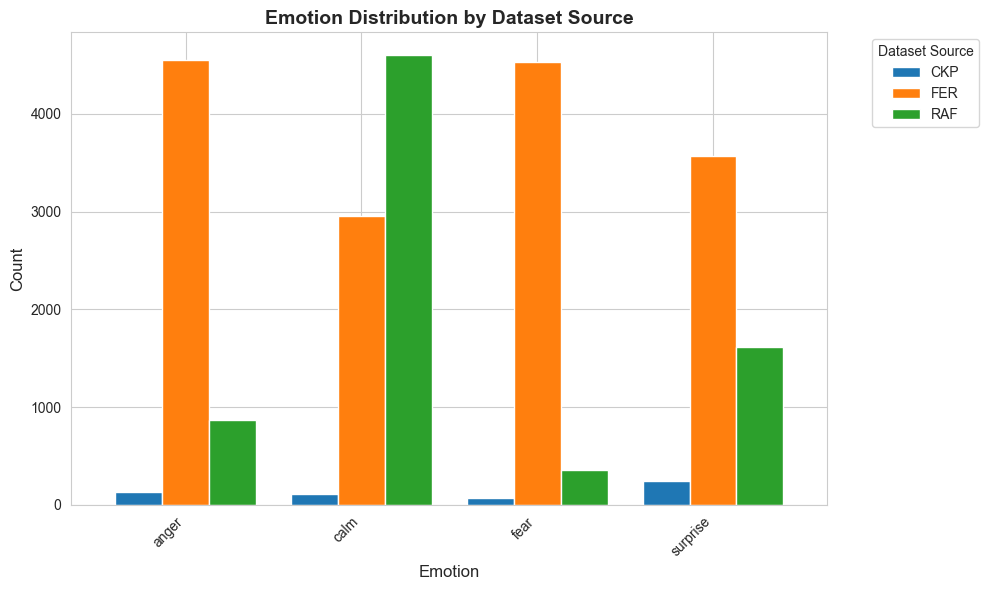

In [13]:
# Emotion by Dataset Source
emotion_dataset_ct = pd.crosstab(df_orig['emotion'], df_orig['dataset_source'])
print("Emotion by Dataset Source:")
print(emotion_dataset_ct)
print()

plt.figure(figsize=(10, 6))
emotion_dataset_ct.plot(kind='bar', ax=plt.gca(), width=0.8)
plt.title('Emotion Distribution by Dataset Source', fontsize=14, fontweight='bold')
plt.xlabel('Emotion', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Dataset Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Emotion by Race

Emotion by Race:
race      African-American  Asian  Caucasian
emotion                                     
anger                  369    721       4464
calm                   910   1475       5288
fear                   274    734       3956
surprise               277    753       4409



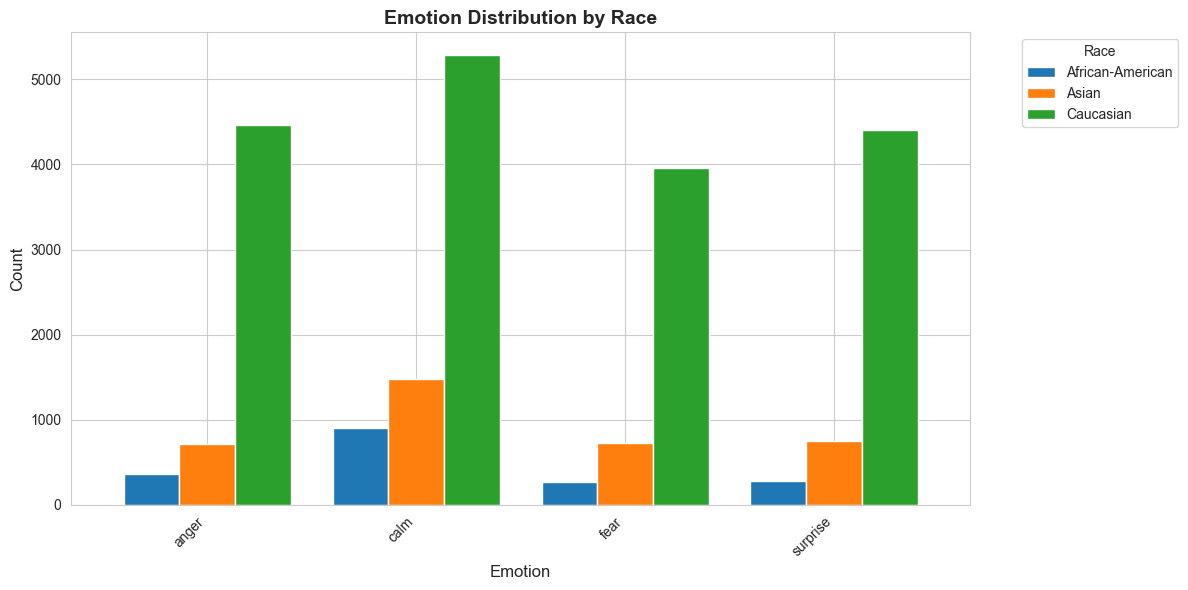

In [14]:
# Emotion by Race
emotion_race_ct = pd.crosstab(df_race['emotion'], df_race['race'])
print("Emotion by Race:")
print(emotion_race_ct)
print()

plt.figure(figsize=(12, 6))
emotion_race_ct.plot(kind='bar', ax=plt.gca(), width=0.8)
plt.title('Emotion Distribution by Race', fontsize=14, fontweight='bold')
plt.xlabel('Emotion', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Emotion by Gender

Emotion by Gender:
gender    female  male
emotion               
anger       1931  3608
calm        3889  3648
fear        2730  2230
surprise    2798  2470



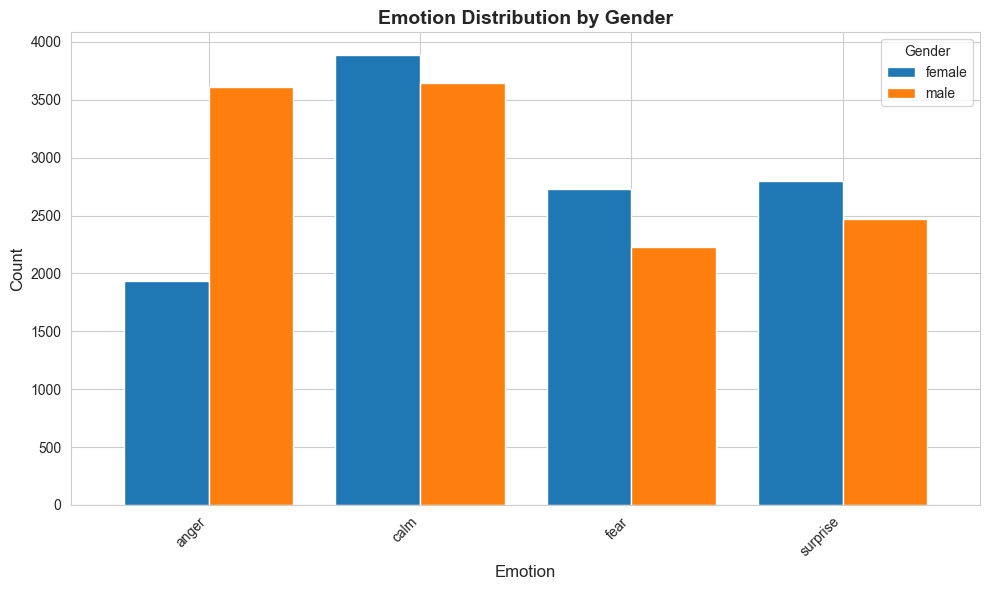

In [15]:
# Emotion by Gender
emotion_gender_ct = pd.crosstab(df_gender['emotion'], df_gender['gender'])
print("Emotion by Gender:")
print(emotion_gender_ct)
print()

plt.figure(figsize=(10, 6))
emotion_gender_ct.plot(kind='bar', ax=plt.gca(), width=0.8)
plt.title('Emotion Distribution by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Emotion', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Gender')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Emotion by Age

Emotion by Age:
age       0-3  20-39  4-19  40-69  70+
emotion                               
anger     262   3211   687   1357   37
calm      479   4529  1250   1147  268
fear      229   3365   596    734   40
surprise  631   3573   799    383   53



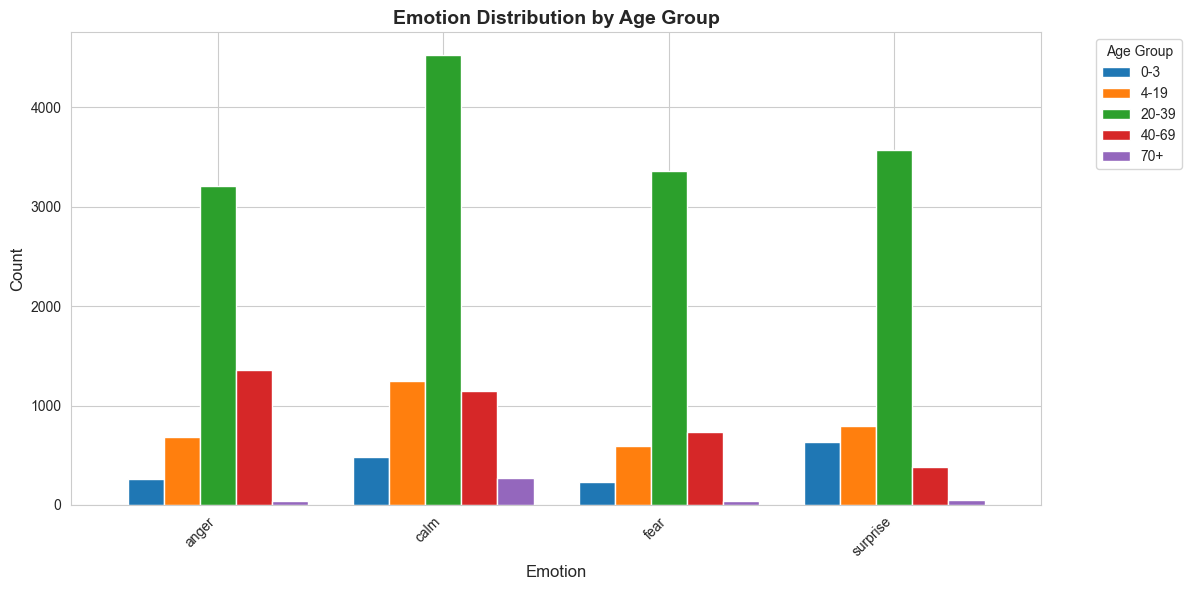

In [16]:
# Emotion by Age
emotion_age_ct = pd.crosstab(df_age['emotion'], df_age['age'])
print("Emotion by Age:")
print(emotion_age_ct)
print()

plt.figure(figsize=(12, 6))
emotion_age_ct[age_order].plot(kind='bar', ax=plt.gca(), width=0.8)
plt.title('Emotion Distribution by Age Group', fontsize=14, fontweight='bold')
plt.xlabel('Emotion', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary Statistics

In [17]:
print("="*60)
print("DATASET SUMMARY (ORIGINAL IMAGES ONLY)")
print("="*60)

print(f"\nTotal original images: {len(df_orig):,}")

print("\n" + "-"*60)
print("DATASET SOURCES")
print("-"*60)
for source, count in df_orig['dataset_source'].value_counts().items():
    pct = (count / len(df_orig)) * 100
    print(f"{source}: {count:,} ({pct:.1f}%)")

print("\n" + "-"*60)
print("EMOTIONS")
print("-"*60)
for emotion, count in df_orig['emotion'].value_counts().items():
    pct = (count / len(df_orig)) * 100
    print(f"{emotion}: {count:,} ({pct:.1f}%)")

print("\n" + "-"*60)
print("FAIRNESS ATTRIBUTES")
print("-"*60)

print("\nRace:")
for race, count in df_orig['race'].value_counts().items():
    pct = (count / len(df_orig)) * 100
    print(f"  {race}: {count:,} ({pct:.1f}%)")

print("\nGender:")
for gender, count in df_orig['gender'].value_counts().items():
    pct = (count / len(df_orig)) * 100
    print(f"  {gender}: {count:,} ({pct:.1f}%)")

print("\nAge:")
for age in age_order:
    count = len(df_orig[df_orig['age'] == age])
    if count > 0:
        pct = (count / len(df_orig)) * 100
        print(f"  {age}: {count:,} ({pct:.1f}%)")

print("\n" + "="*60)

DATASET SUMMARY (ORIGINAL IMAGES ONLY)

Total original images: 23,630

------------------------------------------------------------
DATASET SOURCES
------------------------------------------------------------
FER: 15,613 (66.1%)
RAF: 7,445 (31.5%)
CKP: 572 (2.4%)

------------------------------------------------------------
EMOTIONS
------------------------------------------------------------
calm: 7,673 (32.5%)
anger: 5,554 (23.5%)
surprise: 5,439 (23.0%)
fear: 4,964 (21.0%)

------------------------------------------------------------
FAIRNESS ATTRIBUTES
------------------------------------------------------------

Race:
  Caucasian: 18,117 (76.7%)
  Asian: 3,683 (15.6%)
  African-American: 1,830 (7.7%)

Gender:
  male: 11,956 (50.6%)
  female: 11,348 (48.0%)
  unsure: 326 (1.4%)

Age:
  0-3: 1,601 (6.8%)
  4-19: 3,332 (14.1%)
  20-39: 14,678 (62.1%)
  40-69: 3,621 (15.3%)
  70+: 398 (1.7%)

